# ```aggregate```: Simple Examples

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='white')
sns.set_palette("husl", 4, .75)
sns.set_style("ticks")
import sys
sys.path.insert(0,'/s/telos/python')

In [5]:
import aggregate as agg

In [6]:
uw = agg.Underwriter()

In [7]:
uw.list()

,Curves,Blocks,Books
0,fixed,scs,bodoff1
1,directors_a,casxol,bodoff2
2,directors_b,cata,bodoff3
3,directors_c,catb,bodoff4
4,cata,catc,Three Line Example
5,catb,catd,Single
6,catc,cate,Mixed
7,catd,noncata,Sublines
8,cate,noncatb,small_medium_large
9,noncata,comm_auto,mass_test


In [8]:
uw.describe()

,Type,Severity,EN,ESev,ELoss,Notes
Name,,,,,,
fixed,curves,dhistogram,0.000000e+00,0.0,0,a fixed loss of 1
directors_a,curves,lognorm,0.000000e+00,10000000.0,0,
directors_b,curves,lognorm,0.000000e+00,10000000.0,0,
directors_c,curves,lognorm,0.000000e+00,10000000.0,0,
cata,blocks,pareto,1.700000e+00,0.0,0,can put notes here to describe provenance of curve
catb,blocks,pareto,1.400000e+00,0.0,0,
catc,blocks,pareto,1.300000e+00,0.0,0,
catd,blocks,pareto,1.100000e+00,0.0,0,
cate,blocks,pareto,7.000000e-01,0.0,0,


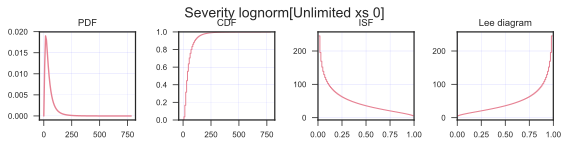

In [9]:
(0.001*uw['noncata']).write().plot()

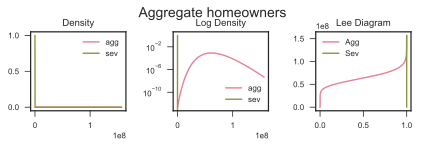

In [10]:
biz = uw.homeowners.write()
biz.update(np.linspace(0, 250e6, 1<<13), approximation='slognorm');
biz.plot('quick')

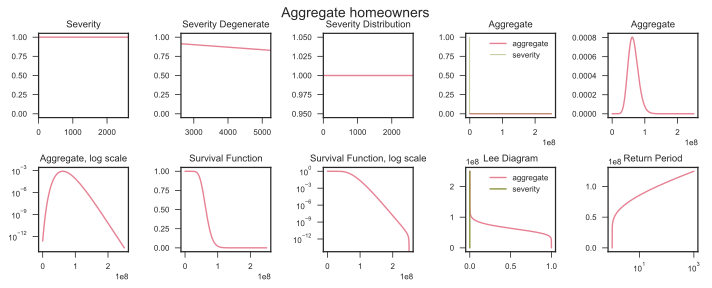

In [11]:
biz.plot('long')

In [12]:
biz.report('all')

homeowners                                                      \
measure          P99.9e        cv           ex1           ex2           ex3   
component                                                                     
agg        1.248702e+08  0.240001  6.506019e+07  4.476641e+15  3.248034e+23   
freq                NaN  0.240000  4.337346e+06  1.989618e+13  9.623804e+19   
sev                 NaN  0.500000  1.500000e+01  2.812500e+02  6.591797e+03   

                                        
measure     limit          mean   skew  
component                               
agg        2500.0  6.506019e+07  0.480  
freq          NaN  4.337346e+06  0.480  
sev           NaN  1.500000e+01  1.625

,name,limit,attachment,el,freq_1,sev_1,agg_1,agg_m,agg_cv,agg_skew
0,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,6.50602e+07,0.240001,0.48
mixed,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,6.50602e+07,0.240001,0.48


,name,limit,attachment,sevcv_param,el,prem,lr,freq_1,freq_2,freq_3,freq_m,freq_cv,freq_skew,sev_1,sev_2,sev_3,sev_m,sev_cv,sev_skew,agg_1,agg_2,agg_3,agg_m,agg_cv,agg_skew,contagion,mix_cv,wt
0,homeowners,2500,0,0.5,6.50602e+07,0,0,4.33735e+06,1.98962e+13,9.6238e+19,4.33735e+06,0.24,0.48,15,281.25,6591.8,15,0.5,1.625,6.50602e+07,4.47664e+15,3.24803e+23,6.50602e+07,0.240001,0.48,0.24,0.24,1


In [13]:
from importlib import reload
import aggregate.underwriter as trash 

In [14]:
reload(trash)
uw = trash.Underwriter()
# uw.list()

In [15]:
port = uw['bodoff1'].write(update=True)

/s/telos/python\aggregate\port.py:1070: RuntimeWarning: invalid value encountered in maximum
  np.maximum(0, (self.density_df.loc[:, 'e_' + col] - self.density_df.loc[:, 'exa_' + col])) / \
/s/telos/python\aggregate\port.py:1074: RuntimeWarning: invalid value encountered in maximum
  self.density_df.loc[:, 'exa_not_' + col])) / \
C:\Users\steve\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:635: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


In [17]:
port.report('all')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
quake,5,5,3.01544e-10,4.3589,4.3589,-1.58707e-10,100
total,24.8,24.8,2.6353e-10,2.00002,1.82263,-0.0886903,199
wind,19.8,19.8,2.53931e-10,2,2,-1.58706e-10,99


,Mean,CV,Skew,Limit,P99.9Est,Sum p,EmpMean,EmpCV,EmpSkew,EmpEX1,EmpEX2,EmpEX3,P90.0,P95.0,P99.0,P99.6,P99.9,P99.99,P99.9999,MeanErr,CVErr,SkewErr
quake,5,4.3589,4.12948,inf,187.753,1,5,4.3589,4.12948,5,500,50000,0,100,100,100,100,100,100,3.01544e-10,-1.58707e-10,-1.76341e-10
total,24.8,2.00002,2.00005,inf,334.385,1,24.8,1.82263,1.47151,24.8,2658.2,303163,99,100,199,199,199,199,199,2.6353e-10,-0.0886903,-0.264266
wind,19.8,2,1.5,inf,237.966,1,19.8,2,1.5,19.8,1960.2,194060,99,99,99,99,99,99,99,2.53931e-10,-1.58706e-10,-2.64511e-10


,not quake,not wind,quake,total,wind,not quake,not wind,quake,wind,quake,wind
,0,0,0,0,0,1,1,1,1,2,2
0.001,98.901,99.9,99.9,196.52,98.901,195.02,nan,nan,195.02,198.5,197.02
0.002,98.802,99.8,99.8,194.04,98.802,191.04,197.01,197.01,191.04,198,195.04
0.003,98.703,99.7,99.7,191.56,98.703,187.06,196.015,196.015,187.06,197.5,193.06
0.004,98.604,99.6,99.6,189.08,98.604,183.08,195.02,195.02,183.08,197,191.08
0.005,98.505,99.5,99.5,186.6,98.505,179.1,194.025,194.025,179.1,196.5,189.1
0.006,98.406,99.4,99.4,184.12,98.406,175.12,193.03,193.03,175.12,196,187.12
0.007,98.307,99.3,99.3,181.64,98.307,171.14,192.035,192.035,171.14,195.5,185.14
0.008,98.208,99.2,99.2,179.16,98.208,167.16,191.04,191.04,167.16,195,183.16
0.009,98.109,99.1,99.1,176.68,98.109,163.18,190.045,190.045,163.18,194.5,181.18


In [74]:
523 >> 1

261

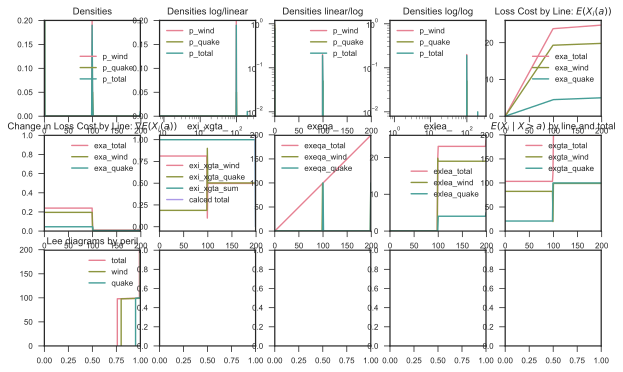

In [18]:
port.plot(kind='audit')

In [53]:
from importlib import reload
import aggregate as agg
import aggregate.underwriter as trash

In [150]:
reload(trash)
uw = trash.Underwriter()

In [151]:
pf = uw.write(' 0.01 * ppa; 0.02 * comm_auto; 0.005 * work_comp', 'test', True, False, log2=16, bs=10e4, remove_fuzz=True)

C:\Users\steve\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
/s/telos/python\aggregate\port.py:1070: RuntimeWarning: invalid value encountered in maximum
  np.maximum(0, (self.density_df.loc[:, 'e_' + col] - self.density_df.loc[:, 'exa_' + col])) / \
/s/telos/python\aggregate\port.py:1074: RuntimeWarning: invalid value encountered in maximum
  self.density_df.loc[:, 'exa_not_' + col])) / \


In [152]:
pf.report('quick')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
0.005 work_comp,1.99826e+08,1.99826e+08,-8.63754e-14,0.190049,0.190049,-1.56641e-12,2.989e+08
0.01 ppa,1.70282e+09,1.70282e+09,-1.28564e-13,0.0890012,0.0890012,2.4023e-12,2.0754e+09
0.02 comm_auto,3.69853e+08,3.69853e+08,5.54179e-12,0.240006,0.240006,-6.08719e-11,6.078e+08
total,2.2725e+09,2.2725e+09,7.99805e-13,0.000583412,0.0790735,134.536,2.713e+09


In [118]:
pf.report('quick')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
0.005 work_comp,1.99826e+08,1.99826e+08,-7.32747e-14,0.180001,0.180001,-1.30573e-12,2.931e+08
0.01 ppa,1.70282e+09,1.70282e+09,-1.25566e-13,0.0900012,0.0900012,2.26197e-12,2.0798e+09
0.02 comm_auto,3.69853e+08,3.69853e+08,5.54179e-12,0.240006,0.240006,-6.08719e-11,6.078e+08
total,2.2725e+09,2.2725e+09,8.02913e-13,0.000445976,0.079526,177.319,2.7157e+09


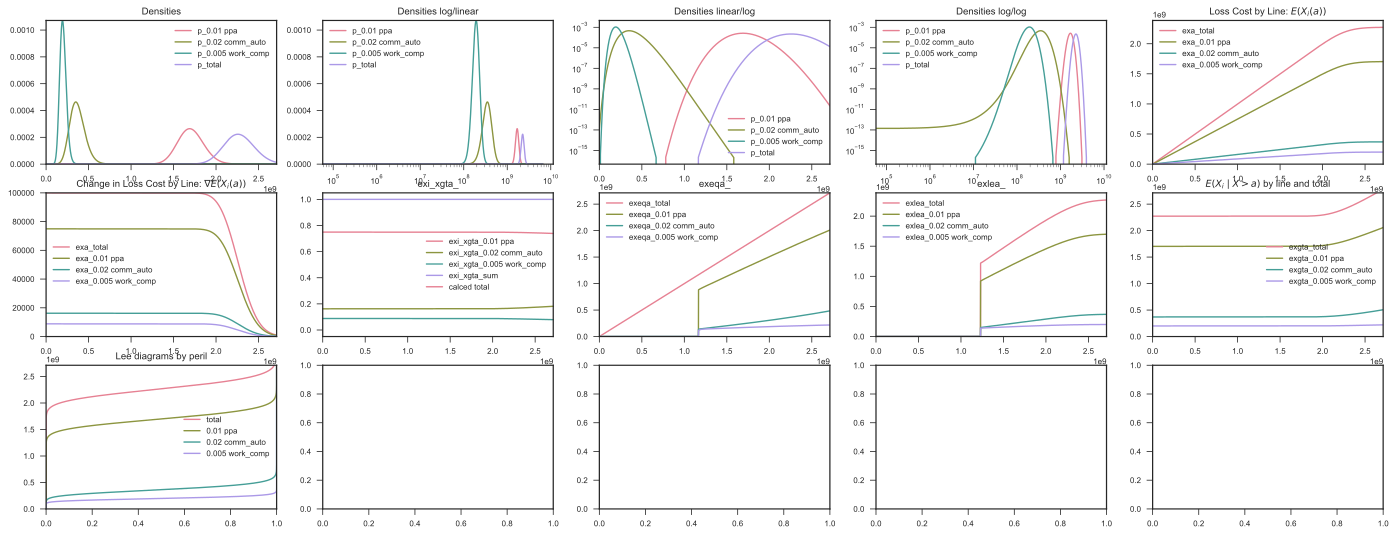

In [153]:
pf.plot('audit', aspect=1.6, height=3)

In [3]:
import aggregate.underwriter as trash

In [155]:
reload(trash)
uw = trash.Underwriter()

In [163]:
ans = uw.script("""
A: 50  claims   gamma 12 cv .30 (mixed gamma 0.014)
A2: 50  claims 30 x 10  gamma 12 cv .30 (mixed gamma 0.014)
A3: 50  claims    gamma 12 cv .30 (mixed gamma 0.014)
A4: 50  claims 30 x 20  gamma 12 cv .30 (mixed gamma 0.14); B 15 claims 15 x 15 lognorm 12 cv 1.5 + 2 mixed gamma 4.8
Cat 1.7 claims 25 x 5 25 * pareto 1.3 0 - 25 poisson 
""", 'my_first_program', True, False, log2=13, bs=0.25, remove_fuzz=True, trim_df=False)

Using the empty construct 
Using the empty construct 


In [164]:
for s in ans:
    print(s.name, s.attachment, s.limit)

A [0] [ inf]
A2 [ 10.] [ 30.]
A3 [0] [ inf]
A4 [ 20.] [ 30.]
B [ 15.] [ 15.]
Cat [ 5.] [ 25.]


In [166]:
ans.report()

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
A,600,597.325,-0.00445882,0.14831,0.148988,0.0045663,817.201
A2,187.146,135.797,-0.27438,0.179086,0.279852,0.562668,230.493
A3,600,597.325,-0.00445882,0.14831,0.148988,0.0045663,817.201
A4,100.604,36.3688,-0.638497,0.239837,0.53765,1.24173,83.8155
B,137.407,105.767,-0.23027,4.80947,0.314733,-0.93456,188.585
Cat,28.2652,24.7489,-0.124404,0.876978,0.880744,0.00429468,83.8155
total,1653.42,1497.33,-0.0944057,0.0845178,0.0926604,0.0963418,1833.46


In [180]:
reload(trash)
uw = trash.Underwriter()

In [185]:
ans = uw.script("""
bin_liab 10 claims bin liaba mixed gamma 0.14
A: 50  claims 30 x 5  gamma 12 cv .30 (mixed gamma 0.014)
A2: 50  claims 30 x 10  gamma 12 cv .30 (mixed gamma 0.014)
A3: 50  claims 30 x 15  gamma 12 cv .30 (mixed gamma 0.014)
A4: 50  claims 30 x 20  gamma 12 cv .30 (mixed gamma 0.14); B 15 claims 15 x 15 lognorm 12 cv 1.5 + 2 mixed gamma 4.8
Cat 1.7 claims 25 x 5 25 * pareto 1.3 0 - 25 poisson 
""", 'my_first_program', True, False, log2=13, bs=0.25, remove_fuzz=True, trim_df=False)

retrieved liaba type <class 'aggregate.underwriter.Curve'>
{'name': 'bin_liab', 'exp_el': 0, 'exp_premium': 0, 'exp_lr': 0, 'exp_en': 10.0, 'exp_attachment': 0, 'exp_limit': inf, 'sev_name': 'lognorm', 'sev_a': 0.0, 'sev_b': 0.0, 'sev_mean': 50, 'sev_cv': 1.0, 'sev_scale': 0.0, 'sev_loc': 0.0, 'freq_name': '', 'freq_a': 0, 'freq_b': 0, 'sev_xs': None, 'sev_ps': None, 'sev_wt': 1}


/s/telos/python\aggregate\port.py:1070: RuntimeWarning: invalid value encountered in maximum
  np.maximum(0, (self.density_df.loc[:, 'e_' + col] - self.density_df.loc[:, 'exa_' + col])) / \
/s/telos/python\aggregate\port.py:1074: RuntimeWarning: invalid value encountered in maximum
  self.density_df.loc[:, 'exa_not_' + col])) / \


In [186]:
for a in ans:
    print(a)

Aggregate: bin_liab
	EN=10.0, CV(N)=0.346
	1 severity, EX=50.0, CV(X)=1.000
	EA=500.0, CV=0.469
Aggregate: A
	EN=50.0, CV(N)=0.142
	1 severity, EX=7.1, CV(X)=0.504
	EA=352.8, CV=0.159
Aggregate: A2
	EN=50.0, CV(N)=0.142
	1 severity, EX=3.7, CV(X)=0.771
	EA=187.1, CV=0.179
Aggregate: A3
	EN=50.0, CV(N)=0.142
	1 severity, EX=2.5, CV(X)=0.897
	EA=125.5, CV=0.191
Aggregate: A4
	EN=50.0, CV(N)=0.199
	1 severity, EX=2.0, CV(X)=0.947
	EA=100.6, CV=0.240
Aggregate: B
	EN=15.0, CV(N)=4.807
	1 severity, EX=9.2, CV(X)=0.604
	EA=137.4, CV=4.809
Aggregate: Cat
	EN=1.7, CV(N)=0.767
	1 severity, EX=16.6, CV(X)=0.554
	EA=28.3, CV=0.877


In [187]:
ans.report()

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
A,352.795,356.426,0.0102929,0.158959,0.178923,0.125593,516.263
A2,187.146,129.962,-0.30556,0.179086,0.292286,0.6321,230.671
A3,125.548,57.3974,-0.542826,0.190503,0.438441,1.3015,120.828
A4,100.604,33.133,-0.670661,0.239837,0.576472,1.40359,87.8746
B,137.407,108.935,-0.207212,4.80947,0.317543,-0.933975,197.718
Cat,28.2652,25.5775,-0.0950884,0.876978,0.885663,0.00990354,87.8746
bin_liab,500,500.228,0.000455627,0.468615,0.447467,-0.0451285,1153.35
total,1431.77,1211.66,-0.153732,0.167511,0.19931,0.18983,1900.29


In [141]:
for col in ['Cat']:
    print(col)
    t1 = ans.density_df.loc[:, 'e_' + col]
    t2 = ans.density_df.loc[:, 'exa_' + col]
    print(t2[np.isnan(t2)] )

Cat
1712.197908   NaN
Name: exa_Cat, dtype: float64


In [142]:
type(t2)

pandas.core.series.Series

In [149]:
n = np.argwhere(np.isnan(t2))
ans.density_df.filter(regex='p_total|ex(le)?a_A$|loss|F|S|exi_xgta_A$').iloc[n[0][0]-10:n[0][0]+10, :]

,loss,p_total,F,S,exlea_A,exi_xgta_A,exa_A
1617.601338,1617.601338,1.539193e-13,1.0,2.132738e-13,359.0478,0.405258,359.0478
1627.060995,1627.060995,9.015842e-14,1.0,1.231237e-13,359.0478,0.407124,359.0478
1636.520652,1636.520652,5.257707e-14,1.0,7.049916e-14,359.0478,0.410236,359.0478
1645.980309,1645.980309,3.051282e-14,1.0,3.996803e-14,359.0478,0.415278,359.0478
1655.439966,1655.439966,1.761799e-14,1.0,2.231548e-14,359.0478,0.425373,359.0478
1664.899623,1664.899623,1.010326e-14,1.0,1.221245e-14,359.0478,0.440909,359.0478
1674.359280,1674.359280,5.753082e-15,1.0,6.439294e-15,359.0478,0.474138,359.0478
1683.818937,1683.818937,3.237859e-15,1.0,3.219647e-15,359.0478,0.534483,359.0478
1693.278594,1693.278594,1.794775e-15,1.0,1.443290e-15,359.0478,0.653846,359.0478
1702.738251,1702.738251,9.655832e-16,1.0,4.440892e-16,359.0478,1.125000,359.0478


In [120]:
t2[1500:2000]

1504.085455    30.567953
1513.545112    30.567953
1523.004769    30.567953
1532.464426    30.567953
1541.924083    30.567953
1551.383740    30.567953
1560.843396    30.567953
1570.303053    30.567953
1579.762710    30.567953
1589.222367    30.567953
1598.682024    30.567953
1608.141681    30.567953
1617.601338    30.567953
1627.060995    30.567953
1636.520652    30.567953
1645.980309    30.567953
1655.439966    30.567953
1664.899623    30.567953
1674.359280    30.567953
1683.818937    30.567953
1693.278594    30.567953
1702.738251    30.567953
1712.197908          NaN
1721.657565    30.567953
1731.117222    30.567953
                 ...    
1768.955849    30.567953
1778.415506    30.567953
1787.875163    30.567953
1797.334820    30.567953
1806.794477    30.567953
1816.254134    30.567953
1825.713791    30.567953
1835.173448    30.567953
1844.633105    30.567953
1854.092762    30.567953
1863.552419    30.567953
1873.012076    30.567953
1882.471733    30.567953
1891.931390    30.567953


In [112]:
ans = uw.script("""
A: 50  claims 30 x 5  lognorm 12 cv .80 (mixed gamma 0.014)
A2: 50  claims 15 x 0  lognorm 12 cv .80 (mixed gamma 0.014)
A3: 50  claims 20 x 0  lognorm 12 cv .80 (mixed gamma 0.014)
A4: 50  claims 30 x 0  lognorm 12 cv .80 (mixed gamma 0.14); B 15 claims 15 x 15 lognorm 12 cv 0.75 + 2 mixed gamma 4.8
Cat 1.7 claims 125 x 0 25 * pareto 1.3 0 - 25 poisson 
""", 'my_first_program', True, False, log2=13, bs=1, remove_fuzz=True)

In [113]:
ans.recommend_bucket()

,bs10,bs11,bs12,bs13,bs14,bs15,bs16,bs18,bs20
line,,,,,,,,,
A,0.687396,0.343698,0.171849,0.085925,0.042962,0.021481,0.010741,0.002685,0.000671
A2,0.713748,0.356874,0.178437,0.089219,0.044609,0.022305,0.011152,0.002788,0.000697
A3,0.795761,0.397881,0.198940,0.099470,0.049735,0.024868,0.012434,0.003108,0.000777
A4,0.995953,0.497977,0.248988,0.124494,0.062247,0.031124,0.015562,0.003890,0.000973
B,6.124623,3.062312,1.531156,0.765578,0.382789,0.191394,0.095697,0.023924,0.005981
Cat,0.425407,0.212703,0.106352,0.053176,0.026588,0.013294,0.006647,0.001662,0.000415
total,9.742889,4.871444,2.435722,1.217861,0.608931,0.304465,0.152233,0.038058,0.009515


In [114]:
ans.report('quick')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
A,422.747,400.63,-0.052317,0.191519,0.206329,0.077329,604.059
A2,480.591,529.799,0.102391,0.155675,0.165253,0.0615281,740.46
A3,528.141,529.799,0.00313932,0.161198,0.165253,0.0251527,740.46
A4,571.062,572.28,0.00213398,0.219114,0.172405,-0.213171,818.403
B,103.764,106.654,0.027852,4.81083,0.370019,-0.923086,214.344
Cat,58.9063,58.8455,-0.00103333,1.15881,1.17012,0.0097636,282.544
total,2165.21,2198.01,0.0151474,0.0855495,0.0889165,0.0393565,2669.55


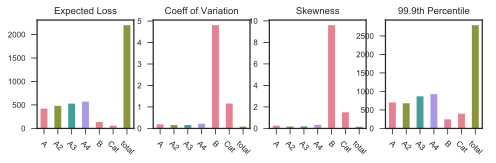

In [111]:
ans.plot('quick')

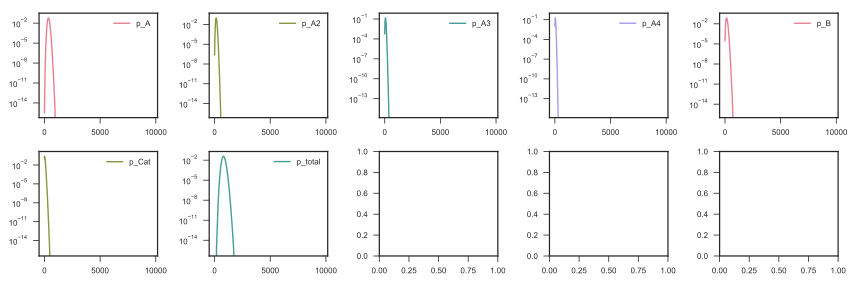

In [78]:
ans.plot('density', aspect=1.2, logy=True, subplots=True)
plt.tight_layout()

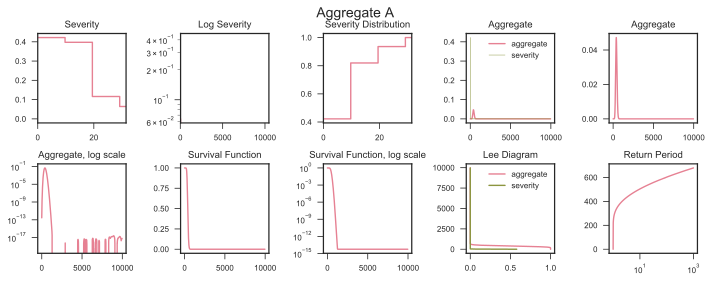

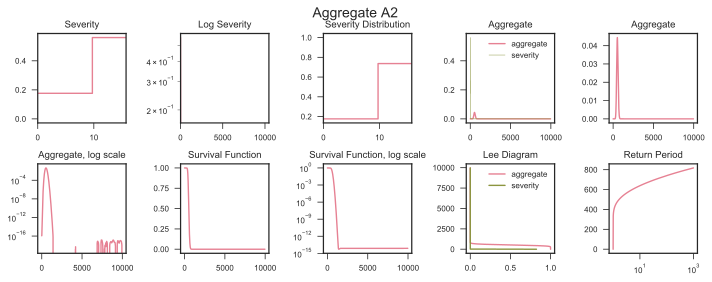

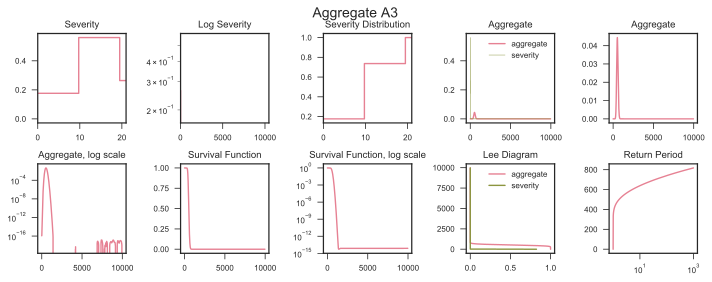

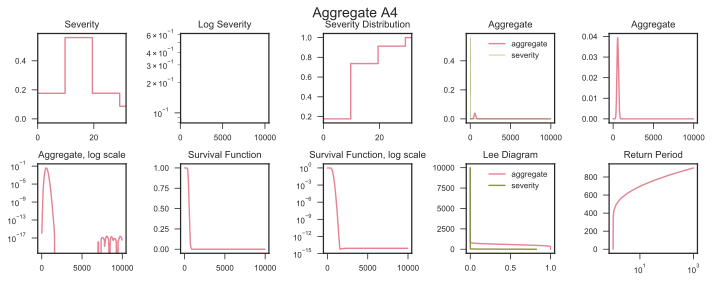

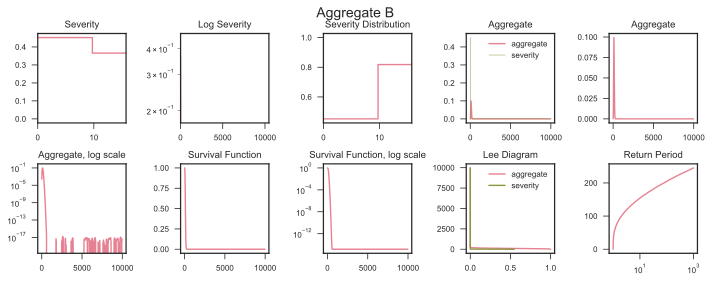

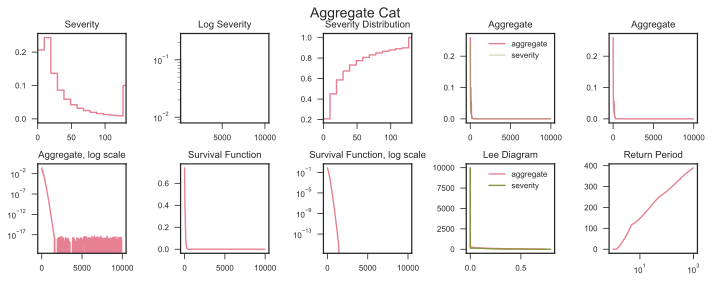

In [115]:
for a in ans:
    a.plot()

In [70]:
ans.report('all')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
A,100.604,99.4254,-0.0117194,0.239837,0.198326,-0.17308,149.575
B,137.407,140.116,0.0197085,0.854969,0.303062,-0.645529,249.292
Cat,28.2652,28.6338,0.0130395,0.876978,0.878898,0.00218902,101.933
total,266.277,268.175,0.00712655,0.195714,0.198206,0.0127294,402.191


,Mean,CV,Skew,Limit,P99.9Est,Sum p,EmpMean,EmpCV,EmpSkew,EmpEX1,EmpEX2,EmpEX3,P90.0,P95.0,P99.0,P99.6,P99.9,P99.99,P99.9999,MeanErr,CVErr,SkewErr
A,100.604,0.239837,0.367141,30,188.623,1,99.4254,0.198326,0.278576,99.4254,10274.2,1.10097e+06,125.2,132.956,149.575,157.331,168.41,183.922,212.729,-0.0117194,-0.17308,-0.241228
B,137.407,0.854969,1.60481,15,803.555,1,140.116,0.303062,0.332941,140.116,21435.5,3.53425e+06,196.11,213.837,249.292,265.911,290.286,325.741,388.895,0.0197085,-0.645529,-0.792535
Cat,28.2652,0.876978,0.943368,25,142.377,1,28.6338,0.878898,0.946303,28.6338,1453.23,92963.7,62.046,76.4495,101.933,116.336,135.172,165.087,218.269,0.0130395,0.00218902,0.00311151
total,266.277,0.195714,0.282706,30,449.417,1,268.175,0.198206,0.284409,268.175,74743,2.16023e+07,337.929,360.088,402.191,423.242,453.157,496.368,572.817,0.00712655,0.0127294,0.00602447


,A,B,Cat,not A,not B,not Cat,total,A,B,Cat,not A,not B,not Cat,A,B,Cat
,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2
0.001,147.716,253.578,124.963,300.26,217.464,353.28,398.441,391.374,400.029,409.136,401.827,396.556,396.794,420.064,412.79,444.676
0.002,141.711,240.823,115.898,285.317,206.485,339.173,382.273,375.311,383.914,392.951,385.669,380.352,380.671,405.082,397.442,430.616
0.003,138.037,233.023,110.045,276.179,199.813,330.499,372.343,365.444,374.01,383.001,375.743,370.394,370.763,395.952,388.069,422.08
0.004,135.325,227.316,105.708,269.495,194.946,324.124,365.054,358.202,366.731,375.688,368.456,363.083,363.485,389.29,381.215,415.877
0.005,133.172,222.781,102.263,264.187,191.101,319.034,359.24,352.427,360.937,369.862,362.643,357.256,357.688,384.008,375.776,410.962
0.006,131.375,219.006,99.9066,259.76,187.898,314.781,354.379,347.604,356.091,364.99,357.781,352.38,352.842,379.612,371.242,406.884
0.007,129.816,215.753,97.8657,255.946,185.144,311.113,350.185,343.44,351.909,360.785,353.59,348.18,348.66,375.834,367.348,403.382
0.008,128.442,212.89,96.0151,252.596,182.728,307.874,346.491,339.775,348.221,357.076,349.895,344.473,344.974,372.516,363.92,400.315
0.009,127.218,210.331,94.3197,249.602,180.57,304.972,343.177,336.486,344.916,353.75,346.58,341.152,341.668,369.554,360.854,397.574
